In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy as np 

In [ ]:
kyp = pd.read_csv("Kyphosis.csv")
#le = LabelEncoder()
#y = le.fit_transform(kyp['Kyphosis'])

In [13]:
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
y = kyp['Kyphosis']
X = kyp.drop('Kyphosis', axis=1)

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=24,
                                                    stratify=y)

In [23]:
gbm = GradientBoostingClassifier(random_state=24)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=24)

In [24]:
y_pred = gbm.predict(X_test)
print(f'Predicted values : {y_pred}')

Predicted values : ['absent' 'present' 'absent' 'present' 'present' 'present' 'absent'
 'absent' 'absent' 'present' 'absent' 'absent' 'present' 'absent' 'absent'
 'present' 'absent' 'absent' 'present' 'absent' 'present' 'absent'
 'absent' 'present' 'present']


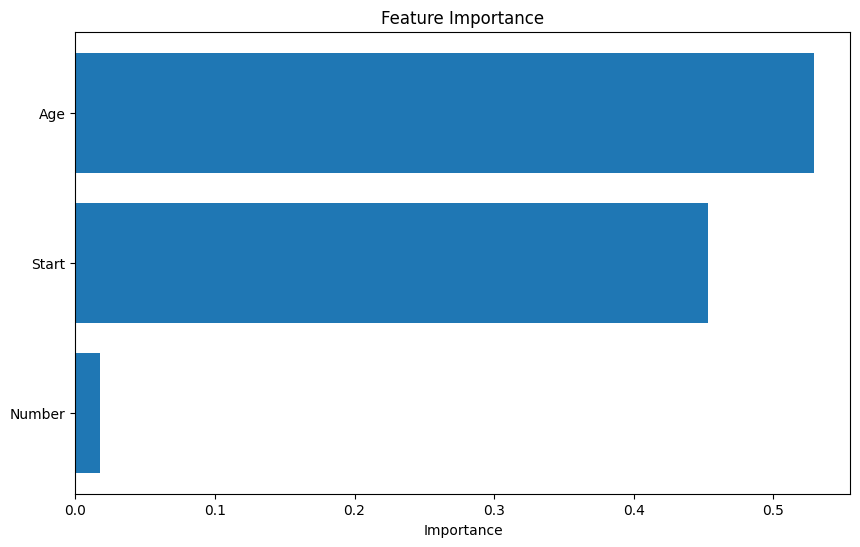

In [25]:
import matplotlib.pyplot as plt
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [10]:
print(accuracy_score(y_test, y_pred))
y_pred_prob = gbm.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

0.68
1.6160680120237196


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")

Confusion Matrix : 
[[13  7]
 [ 1  4]]
Classification Report : 
              precision    recall  f1-score   support

      absent       0.93      0.65      0.76        20
     present       0.36      0.80      0.50         5

    accuracy                           0.68        25
   macro avg       0.65      0.73      0.63        25
weighted avg       0.82      0.68      0.71        25



In [11]:
params = {'learning_rate': np.linspace(0.001, 0.9, 10),
          'max_depth': [None, 2, 3, 4],
          'n_estimators': [25, 50, 100]}
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=24)

In [ ]:
gbm = GradientBoostingClassifier(random_state=24)
gcv = GridSearchCV(gbm, param_grid=params, cv=kfold,
                   scoring='neg_log_loss', verbose=2)
gcv.fit(X, y)
pd_cv = pd.DataFrame( gcv.cv_results_ )
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': np.float64(0.10088888888888889), 'max_depth': 2, 'n_estimators': 25}
-0.48414542978355896


In [19]:
y_pred_grid = gcv.predict(X_test)
compare = pd.DataFrame({
    'Y_true' : y_test,
    'Y_pred' : y_pred,
    'Y_pred_grid' : y_pred_grid
})
compare

,Y_true,Y_pred,Y_pred_grid
46,absent,absent,absent
23,absent,present,absent
14,absent,absent,absent
62,absent,present,absent
0,absent,present,absent
37,present,present,present
29,absent,absent,absent
18,absent,absent,absent
8,absent,absent,absent
12,absent,present,absent


In [21]:
print(accuracy_score(y_test,y_pred_grid))
print(confusion_matrix(y_test,y_pred_grid))

0.96
[[20  0]
 [ 1  4]]
